# Deteccion de bordes
### Norman Vicente

In [8]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt


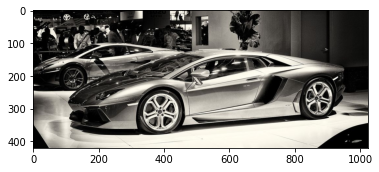

In [61]:
imagen = cv2.imread('carro.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

In [62]:
def derivadaX(img):
  alto = img.shape[0]
  ancho = img.shape[1]
  dx = np.zeros((alto, ancho, 3)) 
  for i in range(0, alto-1):
    for j in range(0, ancho):
      pixel = img[i, j]
      siguiente_pixel = img[i+1, j]
      dx[i, j]=siguiente_pixel - pixel

  return dx

In [63]:
dx = derivadaX(imagen)

In [64]:
dx.shape

(420, 1024, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


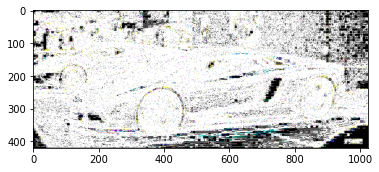

In [65]:
plt.imshow(dx)

In [32]:
def derivadaY(img):
  alto = img.shape[0]
  ancho = img.shape[1]
  dy = np.zeros((alto, ancho, 3)) 
  for i in range(0, alto):
    for j in range(0, ancho-1):
      pixel = img[i, j+1]
      siguiente_pixel = img[i, j]
      dy[i, j]=siguiente_pixel - pixel

  return dy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


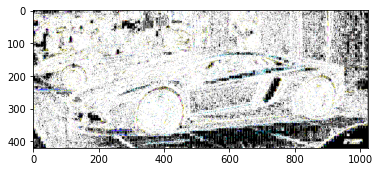

In [38]:
dy = derivadaY(imagen)
plt.imshow(dy)

In [44]:
def magnitud(dx, dy):
  return np.sqrt( np.power(dx, 2) + np.power(dy, 2) )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


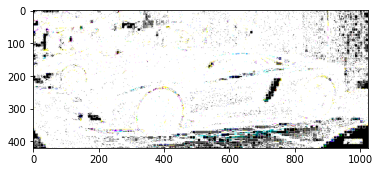

In [47]:
mg = magnitud(dx, dy)
plt.imshow(mg)

In [48]:
def fase(dy, dx):
  return math.atan2(dy,dx)

In [50]:
fase = (dy, dx)
fase.shape
#plt.imshow(fase)

AttributeError: ignored

## Solucion en clase

In [66]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)

    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    
    return newImg

In [67]:
## Solucion en clase
def derX(img):
  alto = img.shape[0]
  ancho = img.shape[1]
  dx = np.zeros((alto, ancho, 1)) 

  kernel = np.array([1/16., 2/16., 1/16.],
                    [2/16., 4/16., 2/16.], [1/16, 2/16., 1/16.])
  
  img = convolutional_filter(img, kernel)

  for i in range(0, alto-1):
    for j in range(0, ancho):
      pixel = img[i, j]
      siguiente_pixel = img[i+1, j]
      dx[i, j]=siguiente_pixel - pixel

  return dx


In [68]:
## Solucion en clase
def derY(img):
  alto = img.shape[0]
  ancho = img.shape[1]
  dx = np.zeros((alto, ancho, 1)) 

  kernel = np.array([1/16., 2/16., 1/16.],
                    [2/16., 4/16., 2/16.], [1/16, 2/16., 1/16.])
  
  img = convolutional_filter(img, kernel)

  for i in range(0, alto):
    for j in range(0, ancho-1):
      pixel = img[i, j]
      siguiente_pixel = img[i, j +1]
      dx[i, j]=siguiente_pixel - pixel

  return dx

In [72]:
def fase(dx, dy):
  alto = dx.shape[0]
  ancho = dx.shape[1]

  fase = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho):
      angulo = int((180/math.pi)*math.atan2(dy[i, j], dx[i,j]))
      fase[1,j] = fase

  return fase

In [73]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho =  magImage.shape[1]
    
    newImg = np.zeros((alto, ancho,1))
    val1 = 0
    val2 = 0
    val3 = 0
    alpha = 0.1
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            vDerecha = magImage[i - 1, j]
            vIzquierda = magImage[i + 1, j]
            if(((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]
            
            if((val2 >= val1) and (val2 >= val3)):
                newImg[i, j] = val2 
                #newImg[i,j] = alpha*val1 + (1-alpha)*val3
                #newImg[i, j] = 255
            else:
                newImg[i, j] = 0     
    return newImg